#  Problem Statement - Socio-economic Factors for Clustering Of Like Nations
​Context

The study of socio-economic factors is foundational to understanding and shaping the future of societies, and therefore, of extreme interest to various government and non-government institutions. While GDP is one of the most popular measures used in popular vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

Objective

To identify clusters of countries that are more similar to each other in terms of certain socio-economic factors

Data Dictionary

The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % age of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita​​



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects for Resume/Country-data.csv')
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


# **Exploratory Data Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [ ]:
df.columns.to_list()

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

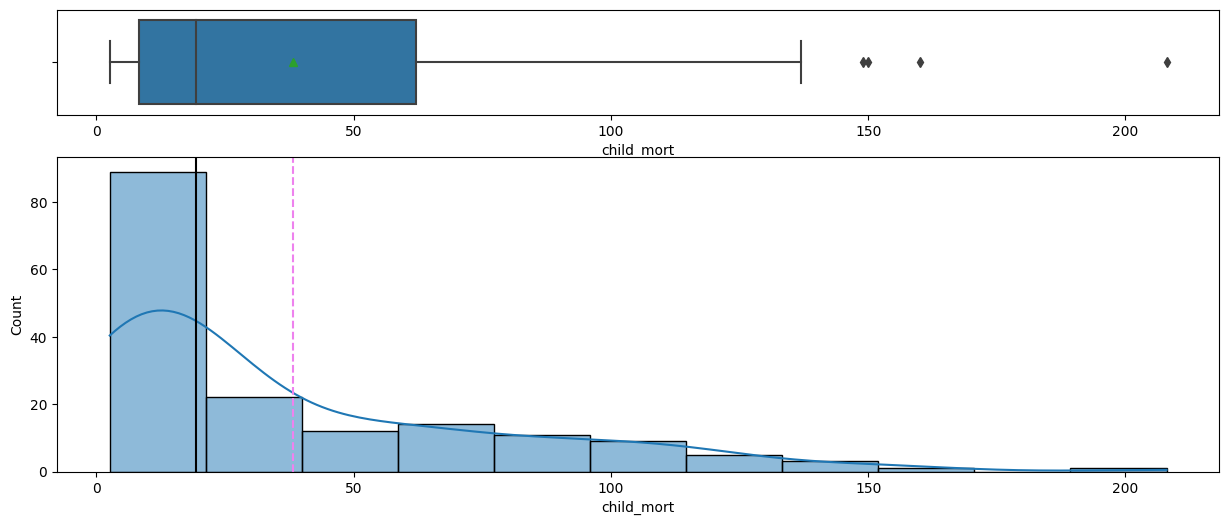

In [ ]:
# sns.boxplot(data = df,x ='child_mort')
# sns.histplot(data = df,x ='child_mort', kde = True)

fig, ax = plt.subplots(2,1, figsize = (15,6), gridspec_kw = {'height_ratios': (1,3)})
sns.boxplot(data = df, x = 'child_mort', showmeans = True, ax = ax[0])
sns.histplot(data = df, x = 'child_mort', ax = ax[1], kde = True)
ax[1].axvline(df['child_mort'].mean(), linestyle = '--', color = 'violet')
ax[1].axvline(df['child_mort'].median(), linestyle = '-', color = 'black')

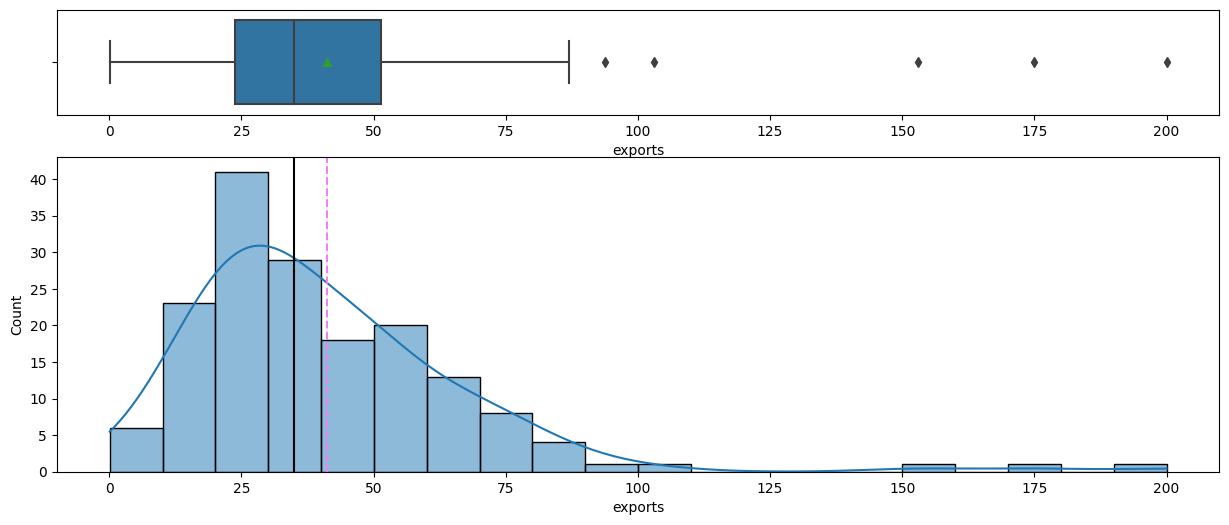

In [ ]:
# sns.boxplot(data = df,x ='exports')
# sns.histplot(data = df,x ='exports', kde = True)

fig, ax = plt.subplots(2,1, figsize = (15,6), gridspec_kw = {'height_ratios': (1,3)})
sns.boxplot(data = df, x = 'exports', showmeans = True, ax = ax[0])
sns.histplot(data = df, x = 'exports', ax = ax[1], kde = True)
ax[1].axvline(df['exports'].mean(), linestyle = '--', color = 'violet')
ax[1].axvline(df['exports'].median(), linestyle = '-', color = 'black')

child_mort
Skew : 1.45


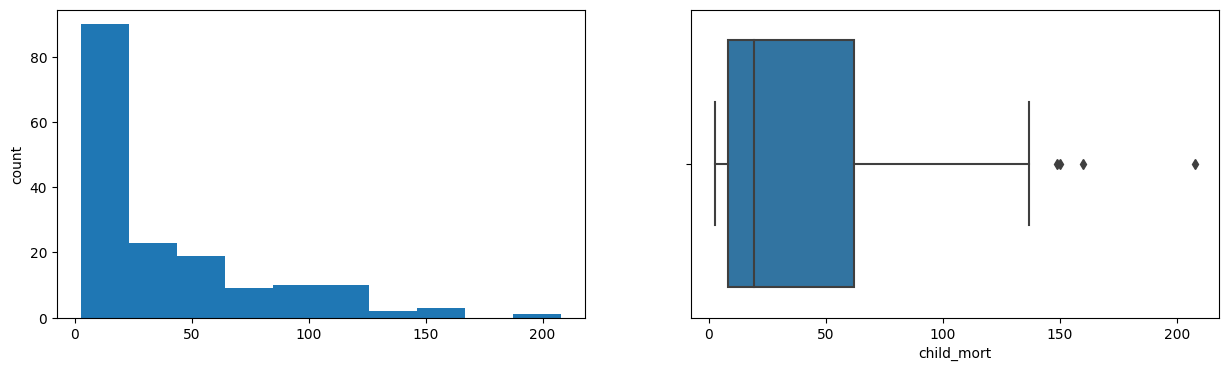

exports
Skew : 2.45


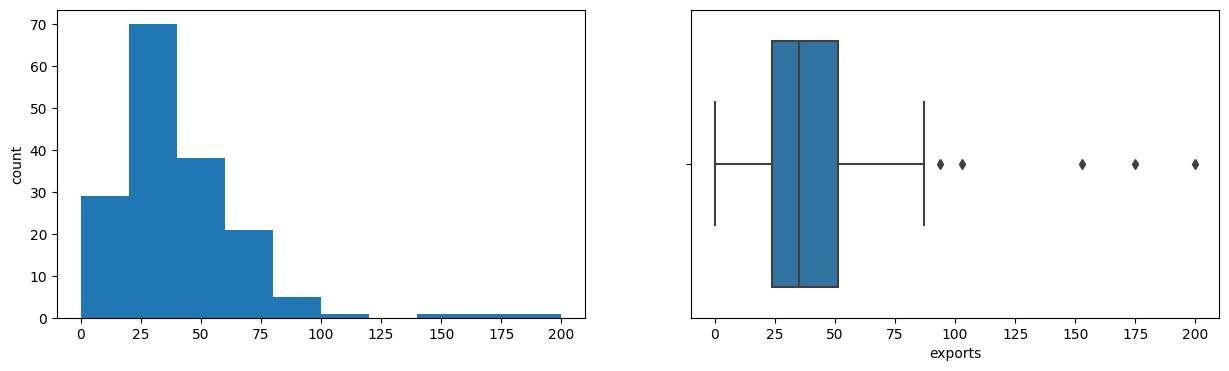

health
Skew : 0.71


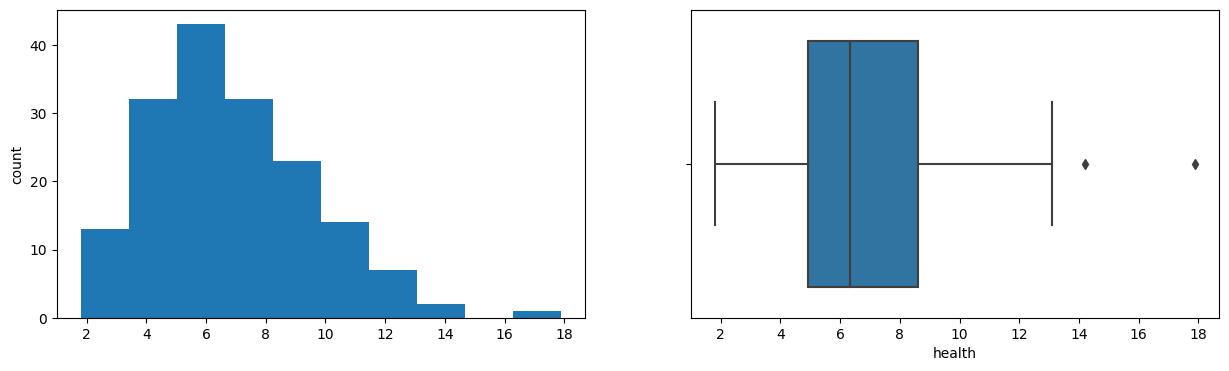

imports
Skew : 1.91


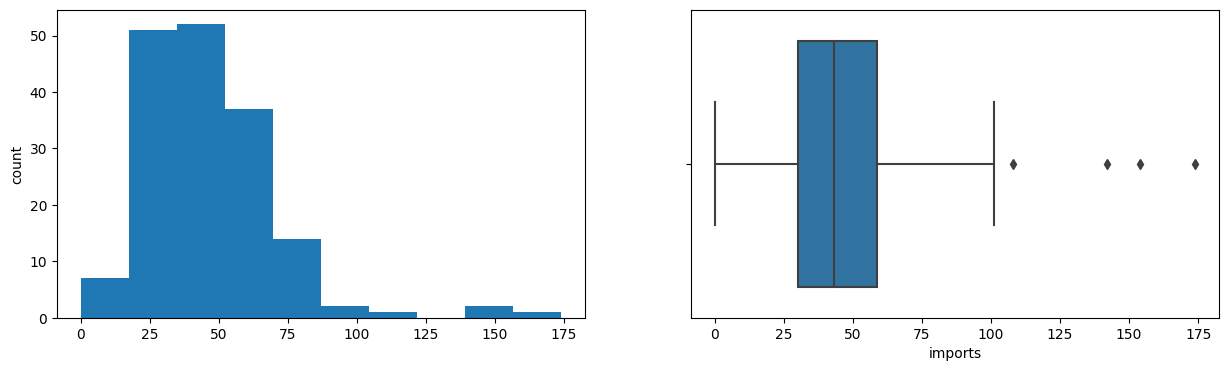

income
Skew : 2.23


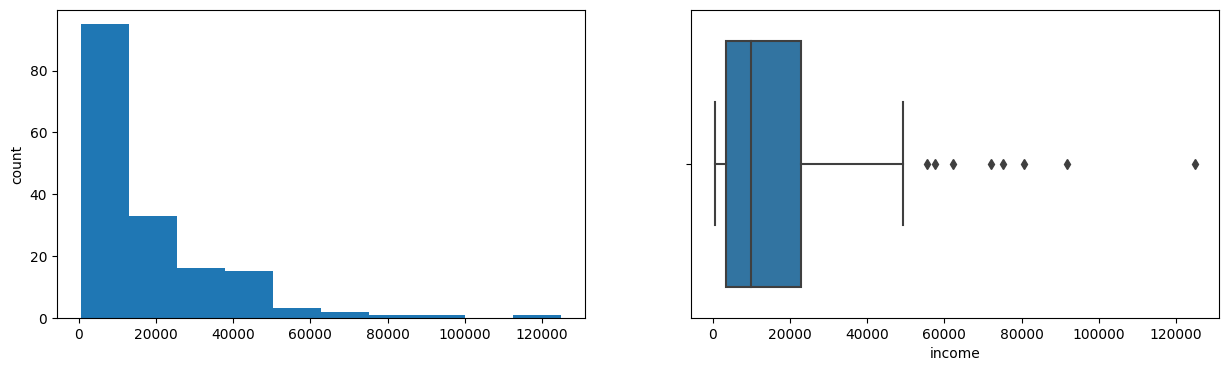

inflation
Skew : 5.15


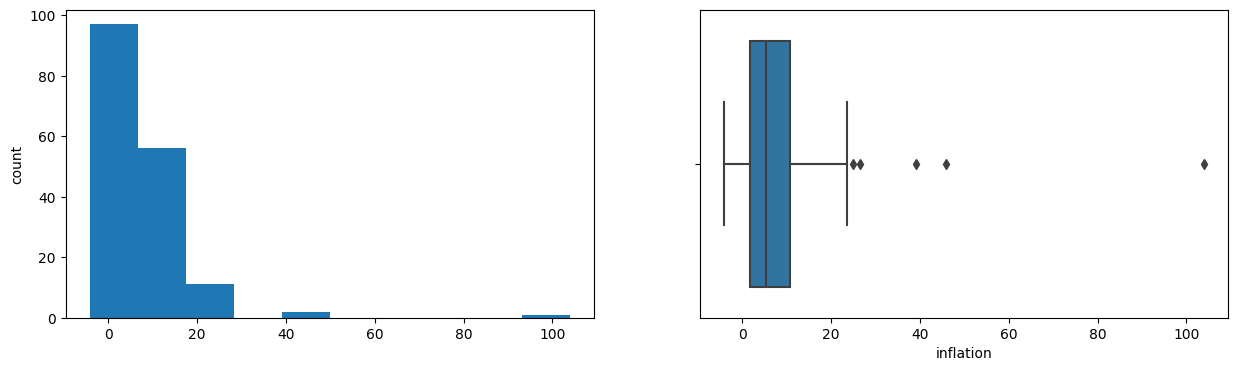

life_expec
Skew : -0.97


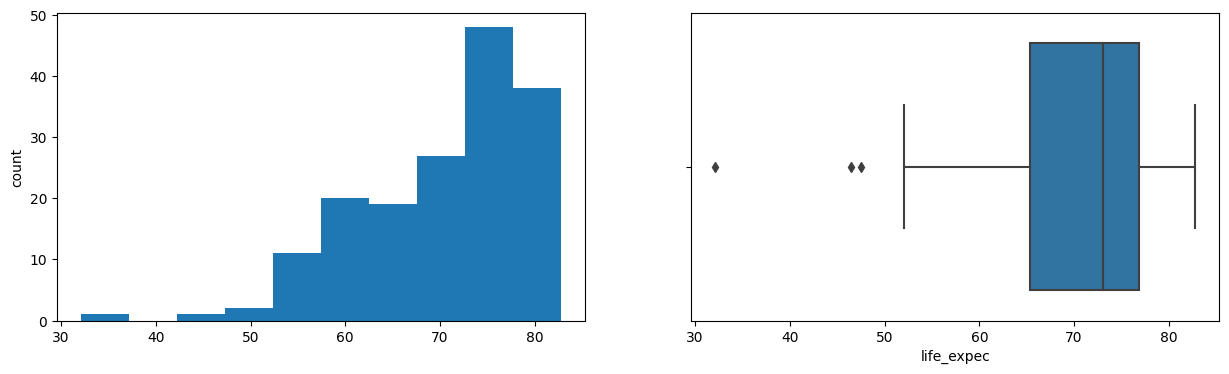

total_fer
Skew : 0.97


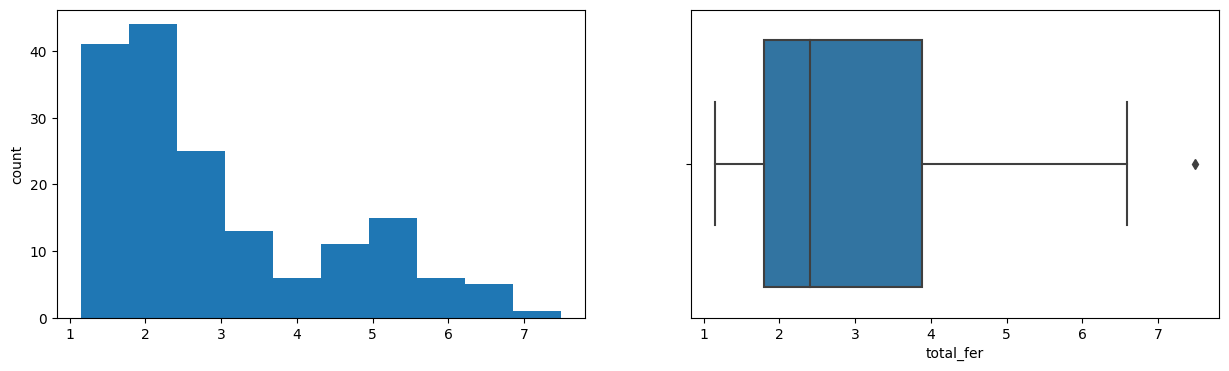

gdpp
Skew : 2.22


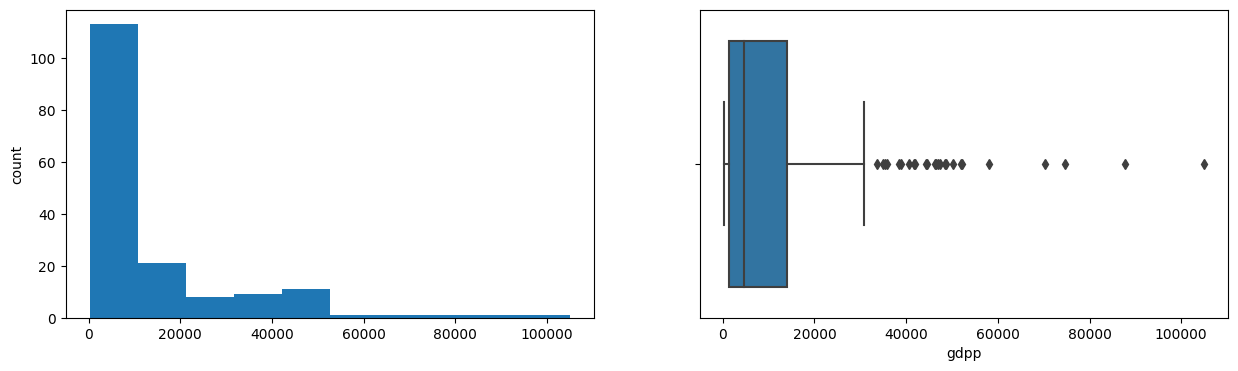

In [ ]:
for col in df.columns[1:]:
    print(col)

    print('Skew :', round(df[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    df[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = df[col])

    plt.show()

<Axes: >

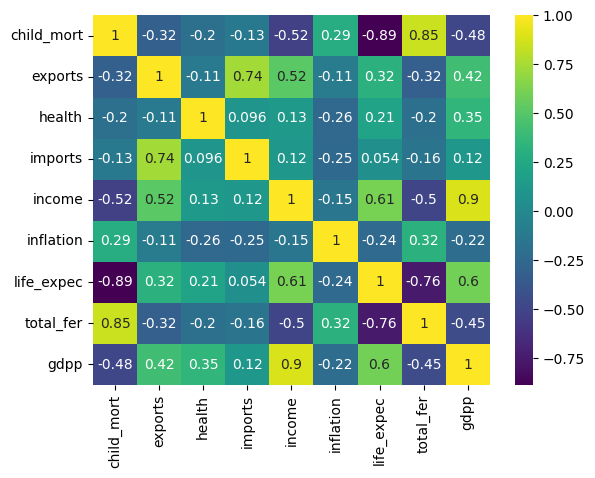

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis') # looks at numerical features in symegtric matrix

gdpp and income
life expectancy with gdpp
neg corr life expectancy and child mortality
child mortality strong pos correlation with fert rate

# SCALE THE DATA



*   Clustering algorithms, distance-based algorithms, so they are affected by the scale of the variables.
*   drop country as unique and GDP to see if clustering without this major predictive feature is possible



In [ ]:
df_scale = df.drop( columns = ['country', 'gdpp'])

In [ ]:
#storing output as new DataFrame

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_scale), columns = df_scale.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [ ]:
# Creating copy of the data to store labels from each algorithm
df_scaled_copy = df_scaled.copy(deep = True)

# **K- MEANS CLUSTERING **

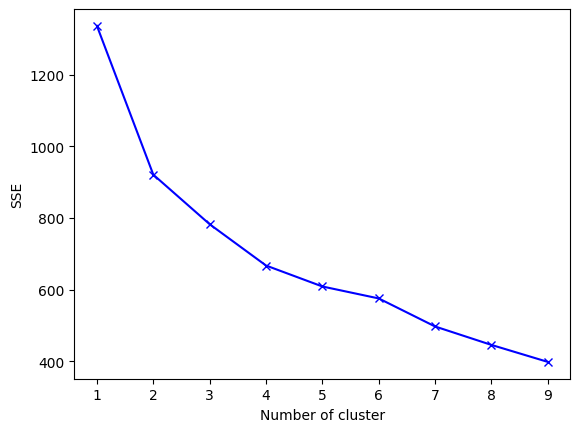

In [ ]:
# Empty dictionary + store the SSE for each value of K
sse = {}

# Iterate for a range of Ks... fit the scaled data to the algorithm
# utilizing inertia attribute from the clustering object + storing the inertia value associated K
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1, n_init = "auto").fit(df_scaled)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

OBSERVATIONS:

- No elbow realy so anywhere between 2 and 8 is a good pick, but 2 or 3 more robust

- trying a silhoutte adjunct method to see if elbow produced

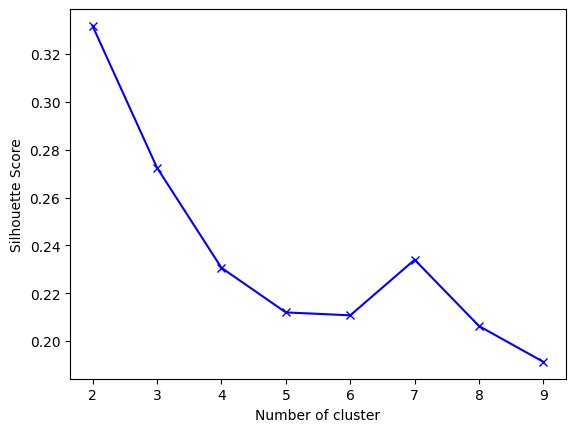

In [ ]:
# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for range of Ks and fit scaled data to algorithm. Store the Silhouette score for that K
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1, n_init = 'auto').fit(df_scaled)

    labels = kmeans.predict(df_scaled)

    sc[k] = silhouette_score(df_scaled, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()

OBSERVATIONS:

as anticipated the first 3 clusters segmented for study

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1, n_init = 'auto')

kmeans.fit(df_scaled)

# Adding predicted labels to the original data and the scaled data
df_scaled_copy['KMeans_Labels'] = kmeans.predict(df_scaled)

df['KMeans_Labels'] = kmeans.predict(df_scaled)

In [ ]:
df['KMeans_Labels'].value_counts()

2    96
0    49
1    22
Name: KMeans_Labels, dtype: int64

In [ ]:
# skewed counts above

In [ ]:
# Calculate mean and  median for original data with each label
mean = df.groupby('KMeans_Labels').mean()

median = df.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,90.810204,7.409091,18.525000,89.30,6.450,16.100
exports,29.271633,88.368182,36.320719,23.80,75.700,34.900
health,6.424286,6.740000,7.032812,5.69,7.185,6.615
imports,43.448980,76.518182,41.856936,42.70,67.950,40.950
income,3860.877551,44322.727273,17696.666667,1870.00,34900.000,13250.000
inflation,11.923163,3.413500,6.669104,8.92,2.355,4.335
life_expec,59.451020,77.940909,74.531250,60.10,77.850,74.600
total_fer,4.961837,1.802727,2.182500,5.05,1.815,2.075
gdpp,1885.306122,32956.818182,14037.333333,897.00,22250.000,6240.000


Time to Visualize the clusters above

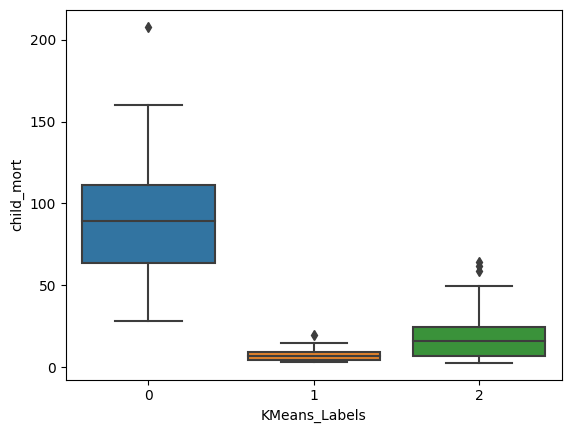

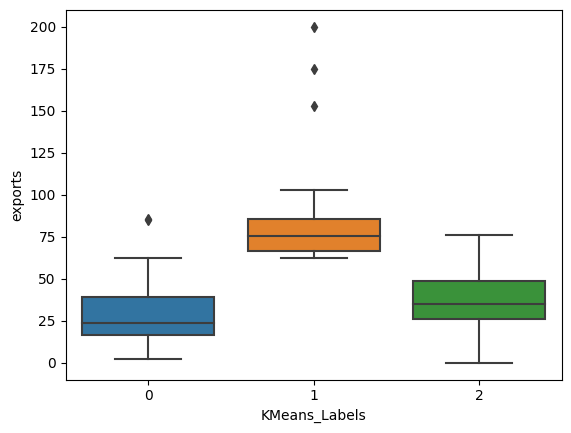

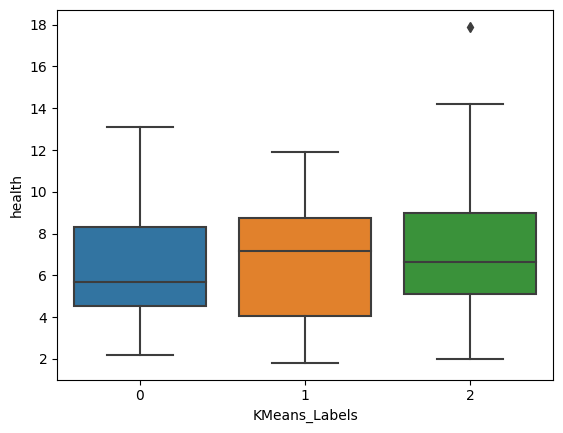

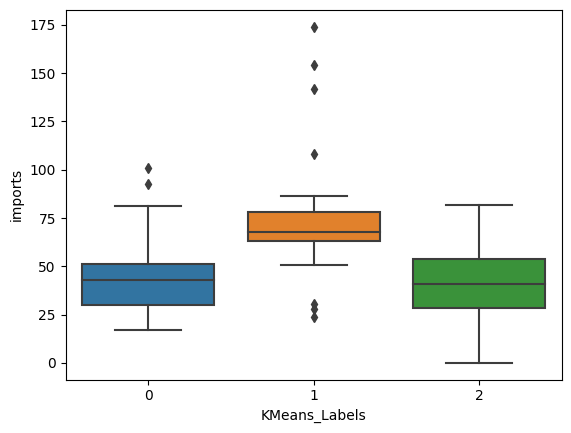

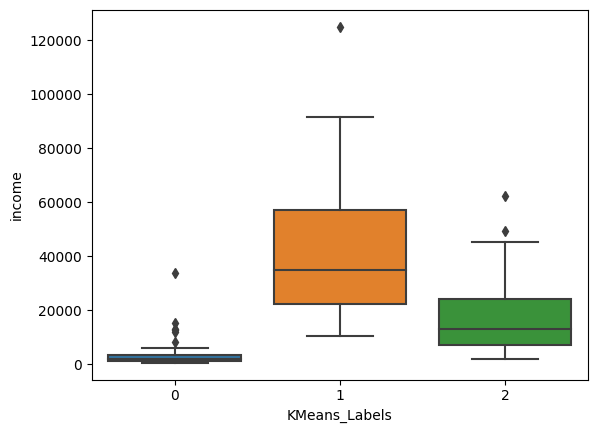

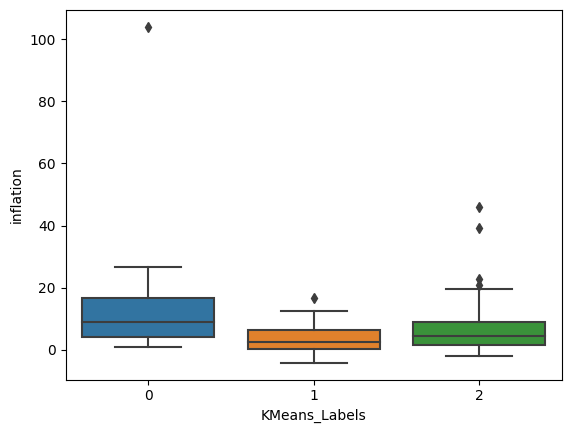

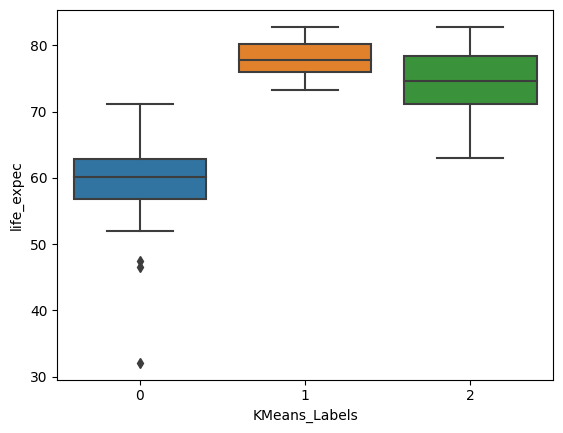

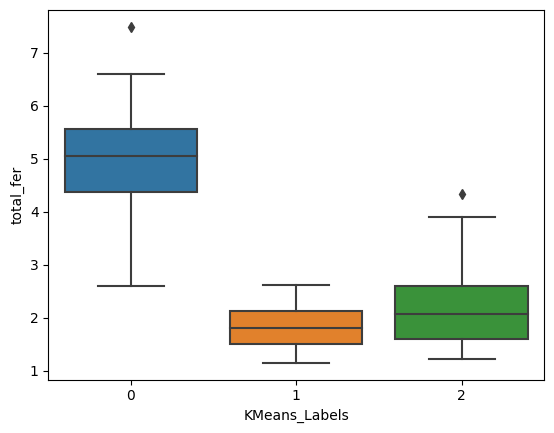

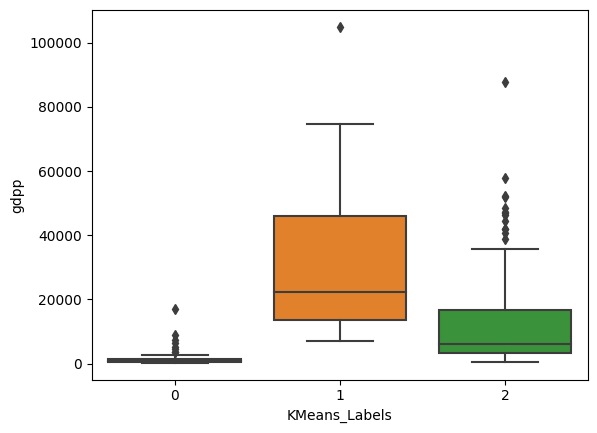

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = df)
    plt.show()

cluster 1 and 2 have higher GDPs and most other indicators of health correlate well to this.

CLuster 0 is likely undeveloped nations

Main isssue is the outlier nations are a small cluster

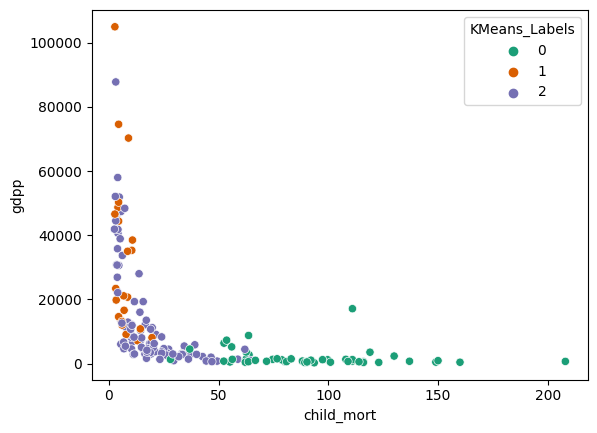

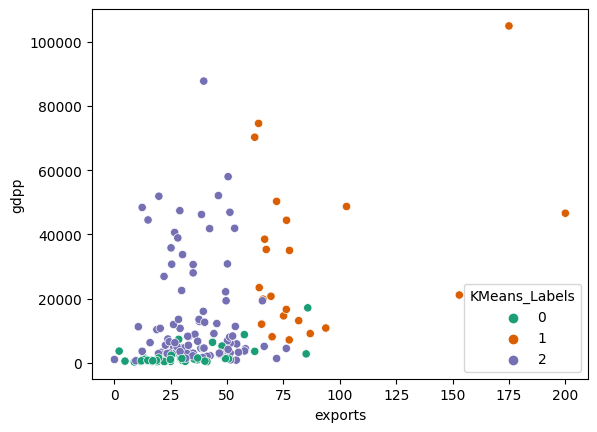

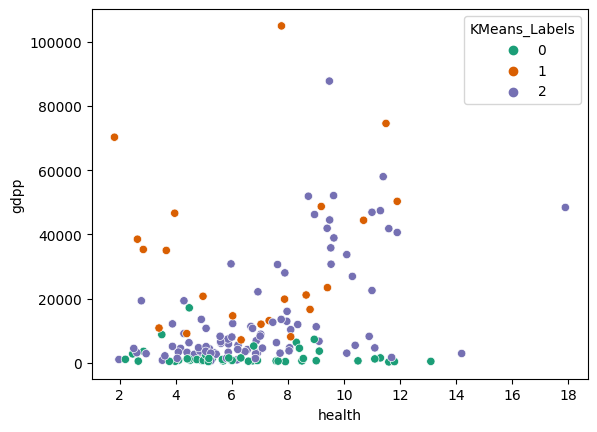

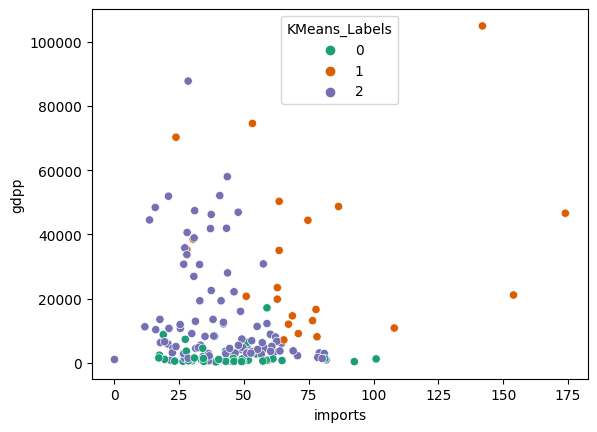

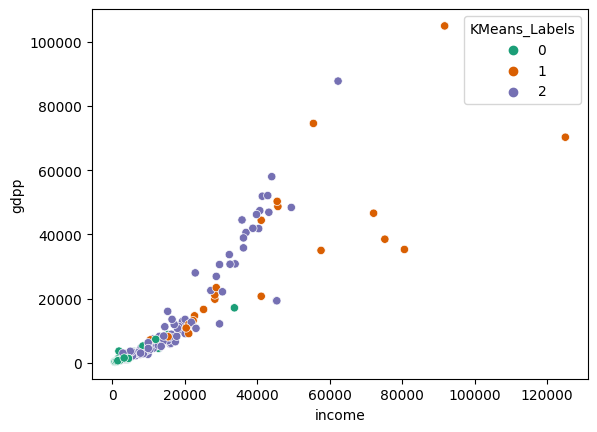

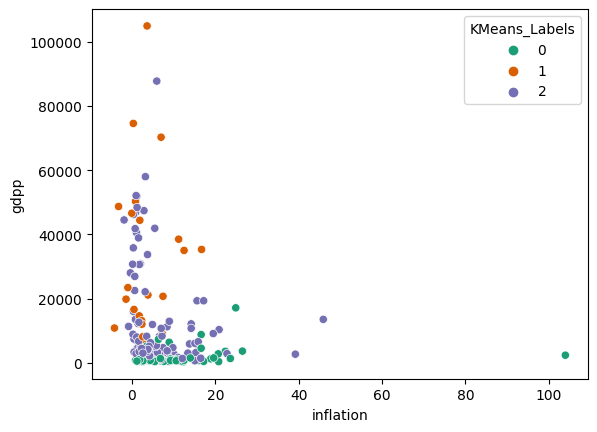

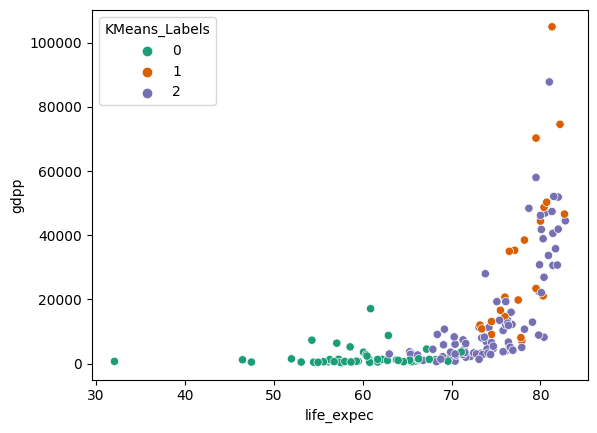

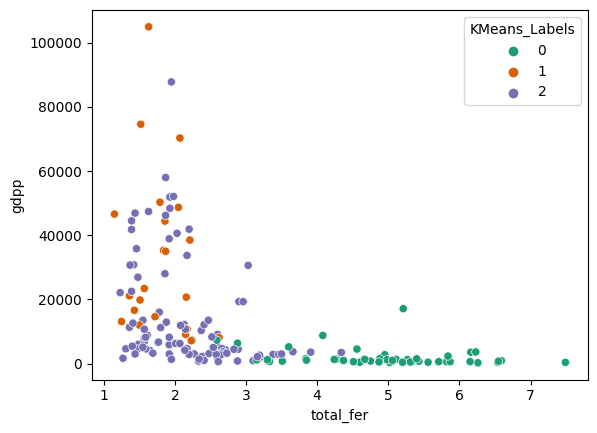

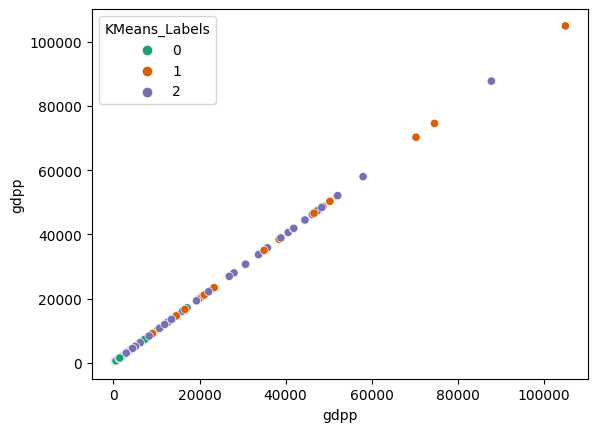

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp', data = df, hue = 'KMeans_Labels', palette = 'Dark2')

    plt.show()

In [ ]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(df_scaled)

df_scaled_copy['kmedoLabels'] = kmedo.predict(df_scaled)

df['kmedoLabels'] = kmedo.predict(df_scaled)

In [ ]:
df.kmedoLabels.value_counts()

1    75
2    58
0    34
Name: kmedoLabels, dtype: int64

In [ ]:
#  mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = df.groupby('kmedoLabels').mean()

median = df.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000


Cluster 0 is high inome countries and cluster 2 is the biggeest developing countries and 1 is likely yet to be developed nations

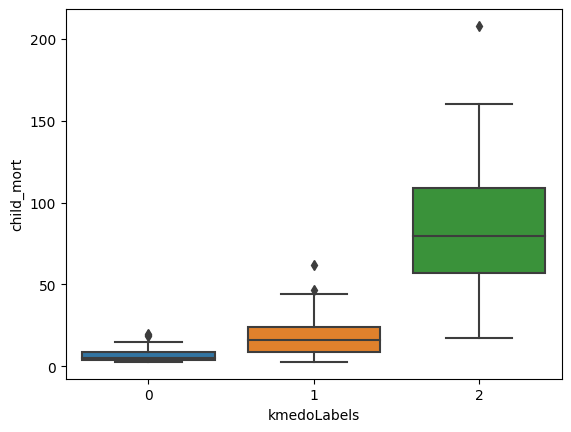

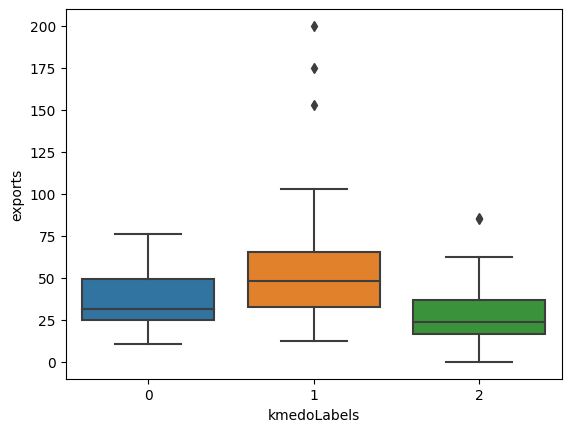

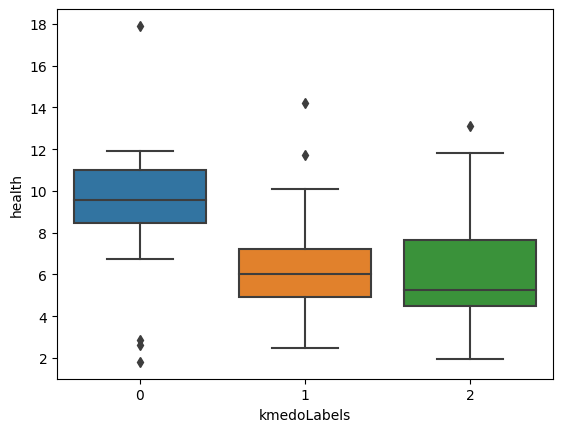

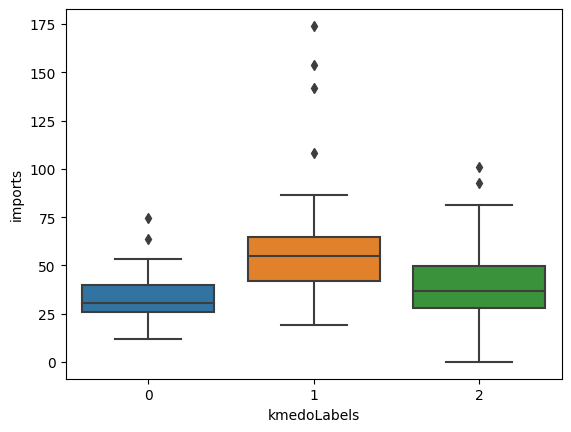

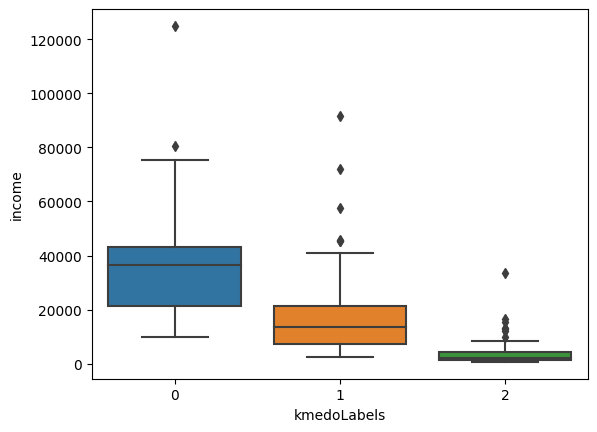

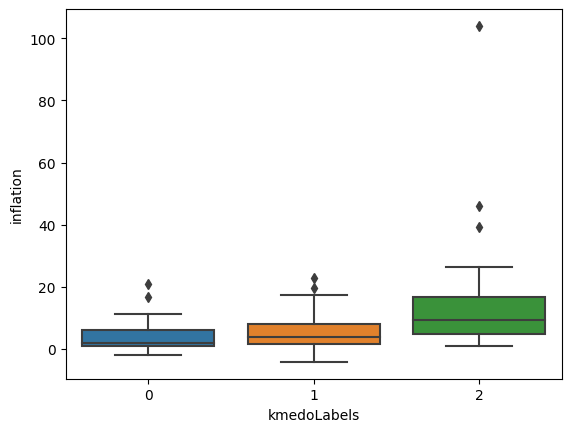

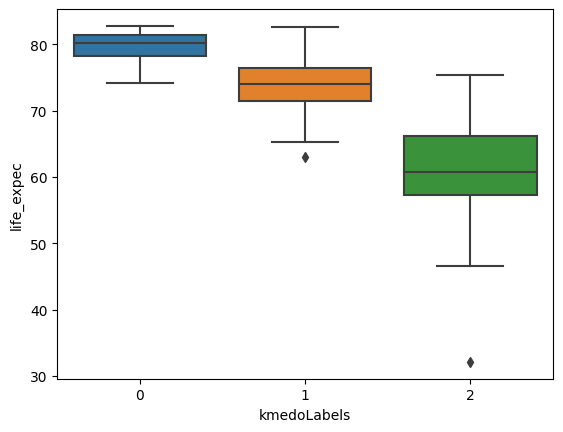

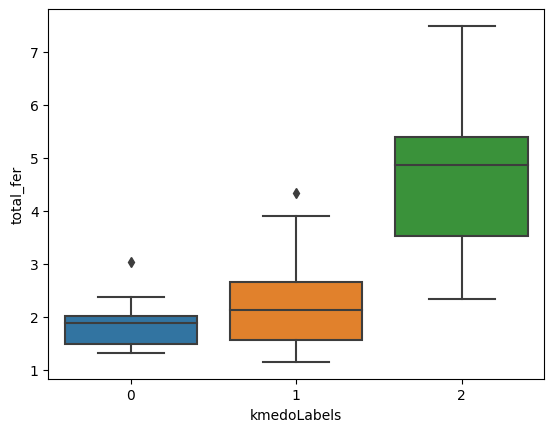

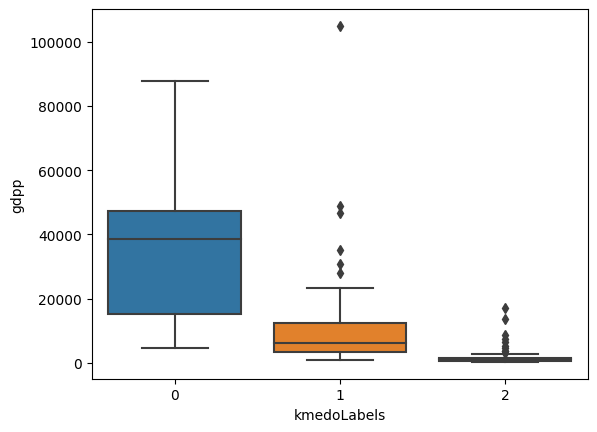

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = df)

    plt.show()

 cluster population from K-Medoids is more evenly distributed in comparison to K-Means clustering.


 the clusters from K_Medoids are less affected by outliers from the data and this drives the poplation size in each cluster


Differing from K-Means, the cluster for developed countries keeps the overall characteristics of developed countries,reflected in life expecatncy, gdp and other wealthy nation indicators.



# IMPLEMENTING Gaussian Mixture Model

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(df_scaled)

df_scaled_copy['GmmLabels'] = gmm.predict(df_scaled)

df['GmmLabels'] = gmm.predict(df_scaled)

In [ ]:
df.GmmLabels.value_counts()

0    67
2    62
1    38
Name: GmmLabels, dtype: int64

In [ ]:
# mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = df.groupby('GmmLabels').mean()

median = df.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,76.459701,5.544737,17.058065,66.80,4.250,16.550
exports,30.704463,60.047368,40.745161,25.00,50.900,35.400
health,6.140000,8.444737,6.547419,5.30,9.405,6.440
imports,43.886058,51.736842,47.166129,42.90,40.950,48.250
income,4578.850746,45431.578947,13386.774194,2520.00,40900.000,12800.000
inflation,11.796642,3.538553,6.043968,8.43,1.395,4.465
life_expec,62.070149,79.707895,74.116129,61.80,80.200,74.150
total_fer,4.404776,1.791579,2.082419,4.60,1.850,2.040
gdpp,2235.880597,40707.105263,7553.870968,1170.00,39750.000,6240.000


Cluster 1 = high income countries
Cluster 0  = low income nations
Cluster 2 = the balance of the nations fall here

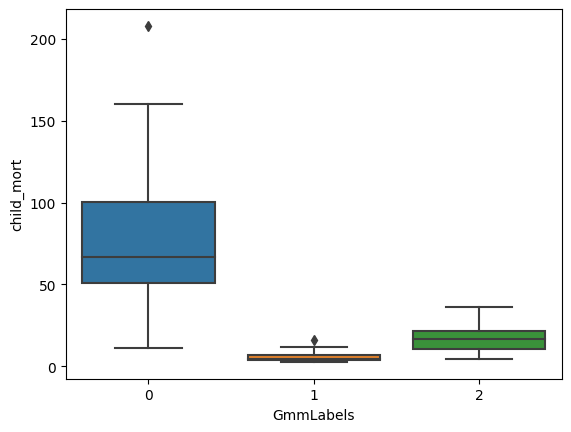

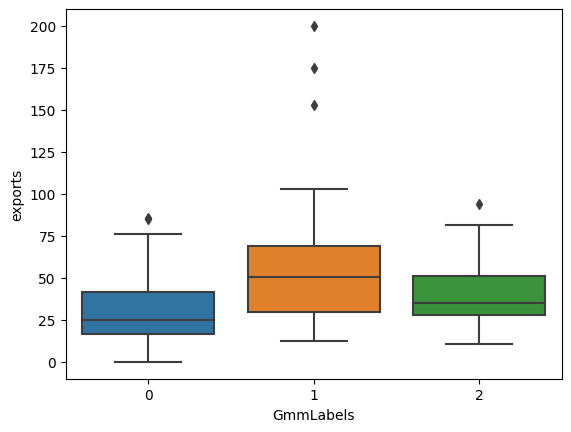

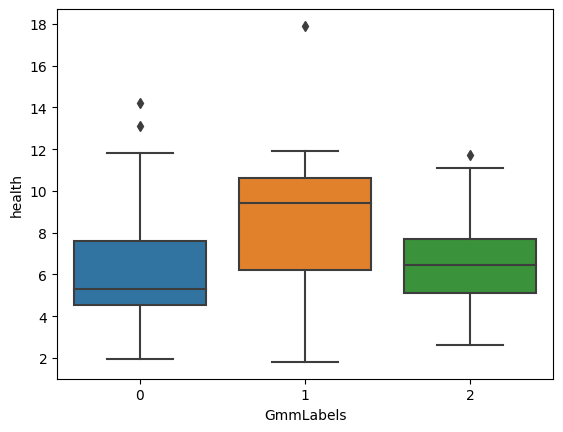

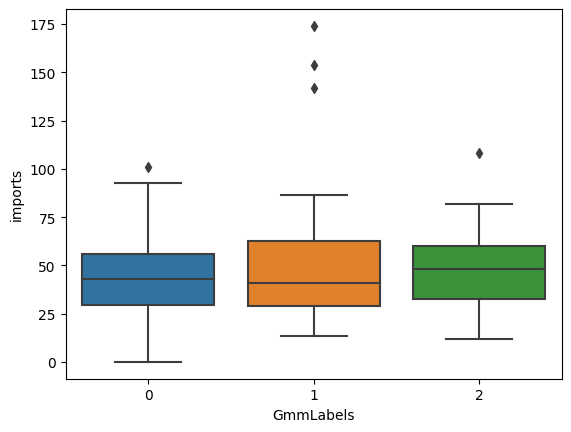

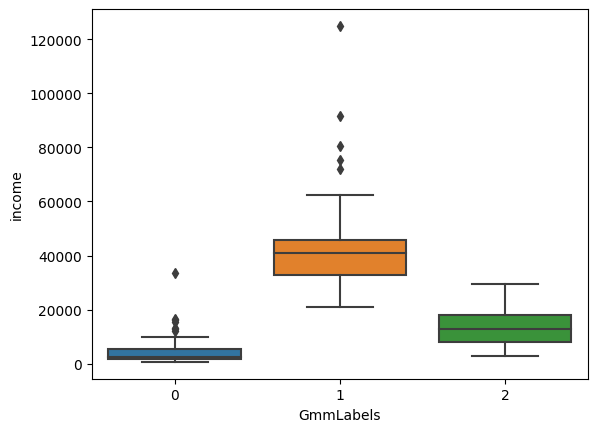

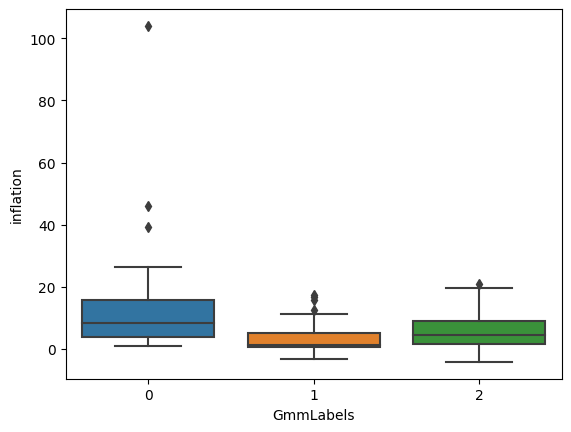

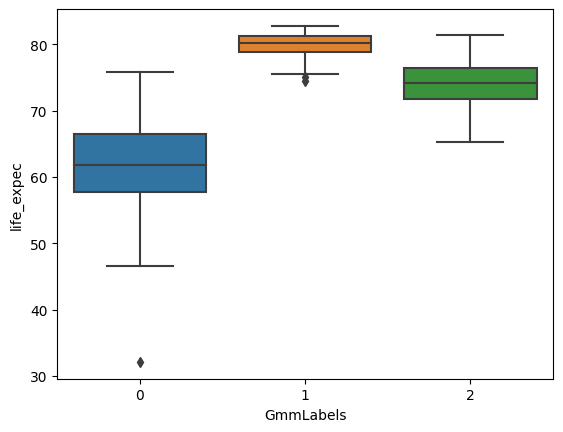

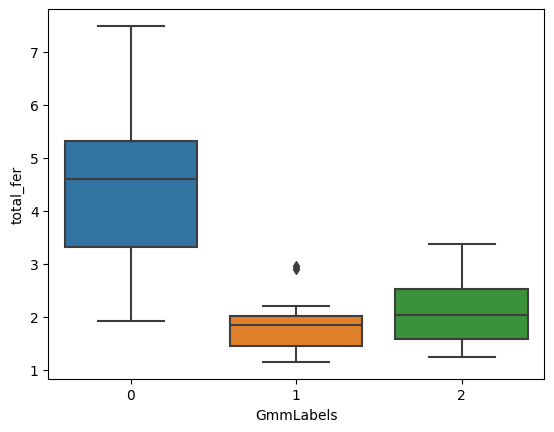

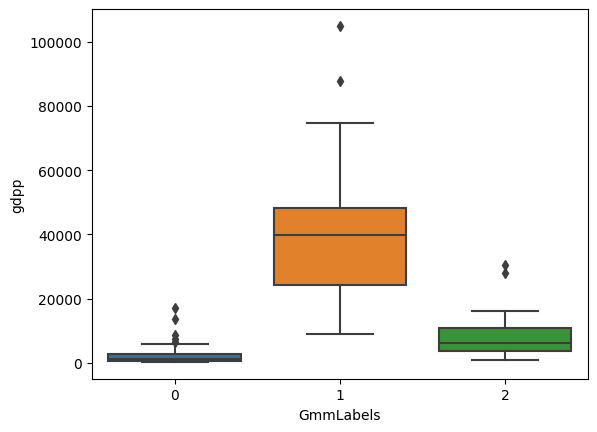

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = df)

    plt.show()

Cluster Profiles:

This clustering solution looks very similar with som eminor differences.

Cluster 1 medians of all wealthy indactors have increased  Thus, this cluster is more representative of wealthy nations than the same cluster in K mediod.

Cluster 0, 'underdeveloped', display median values that have incrased from K-mediods, representing a drift from 'true' poor nations.


Overall, while more evenly distributed than the KMEANS, this may comprimise some classification purity for the sake of even distribution acorss clustering.   Also, Gausian Mixtue models work best with normally distributed subpopulations within the overall population, and thus, our skewed GDPP, income, and child mortality would render this method less effective.

# Hierarchical Clustering

 Agglomerative Hierarchical clustering.
 the number of clusters are determined using a concept called Dendrogram which is a tree-like diagram that records the sequences of merges or splits.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

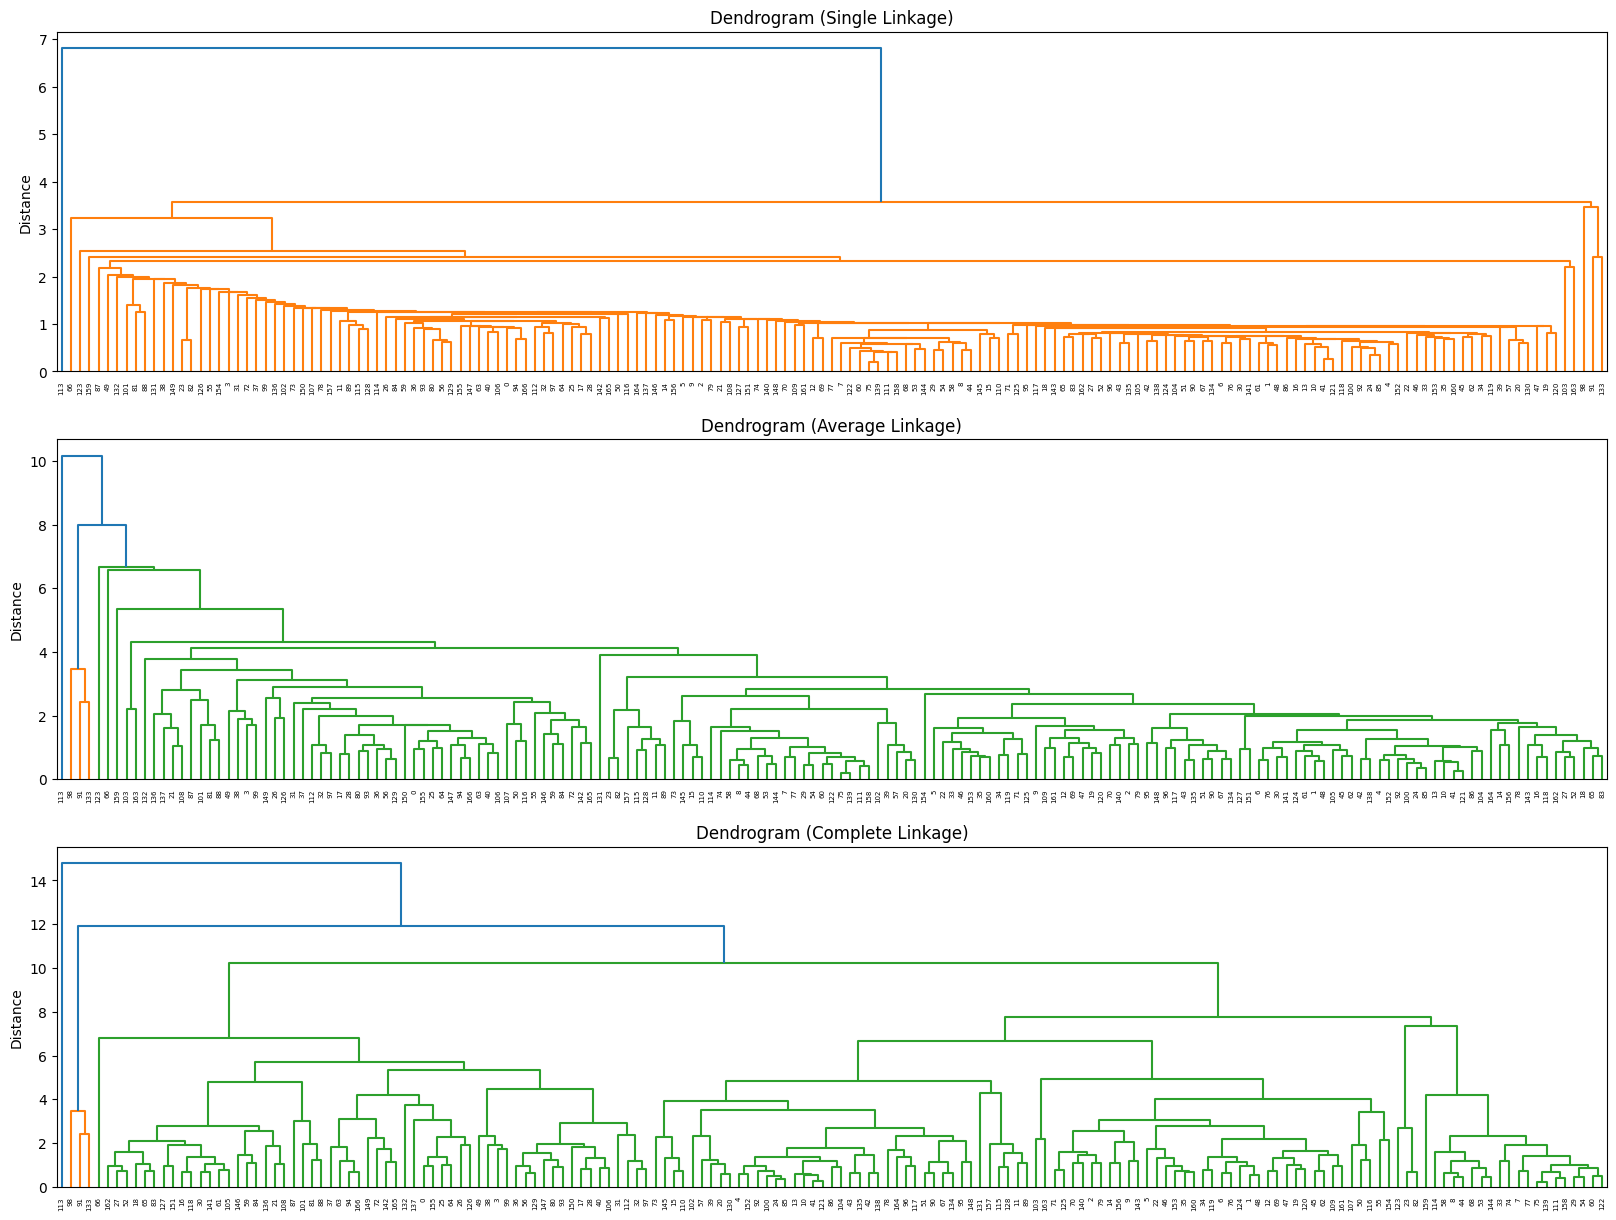

In [ ]:
#  linkage methods to check
methods = ['single',
           'average',
           'complete']

#  subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the above list to get associated linkages and plot dendrograms
for i, method in enumerate(methods):
    Z = linkage(df_scaled, metric = 'euclidean', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

Observations:

 complete linkage produces better separated clusters as the vertical distance connecting those clusters is higher.



 clusters =number of vertical lines which are being intersected by the line drawn using the threshold.


CHOICE IS TO cut it at ~9 since the space between the two nodes is largest.

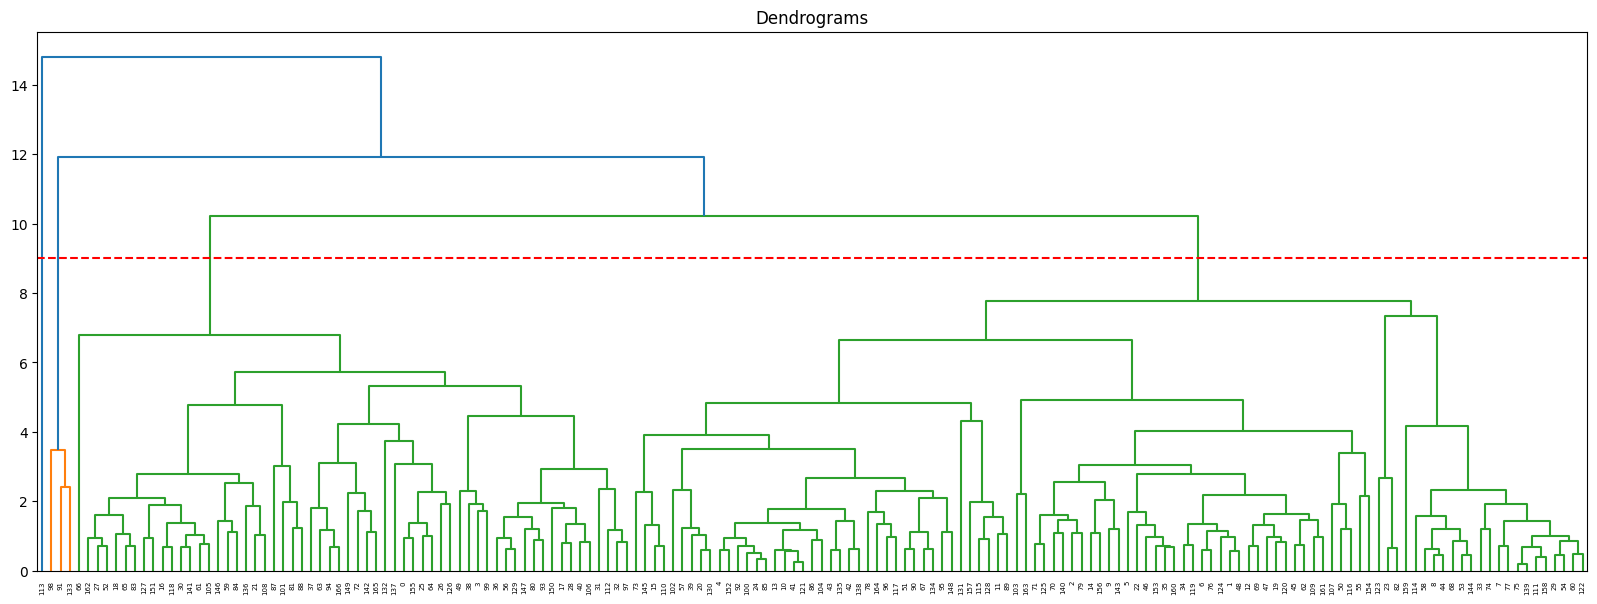

In [ ]:
plt.figure(figsize = (20, 7))

plt.title("Dendrograms")

dend = dendrogram(linkage(df_scaled, method = 'complete'))

plt.axhline(y = 9, color = 'r', linestyle = '--')

we now have 4 clusters

In [ ]:
# Clustering 4 clusters
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

hierarchical.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
df_scaled_copy['HCLabels'] = hierarchical.labels_

df['HCLabels'] = hierarchical.labels_

In [ ]:
df.HCLabels.value_counts()

0    103
1     60
2      3
3      1
Name: HCLabels, dtype: int64

In [ ]:
# Check 3 countries in cluster 2
df[df.HCLabels == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,1,1,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1,1,1,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,1,1,2


In [ ]:
# Check 1 country in cluster 3
df[df.HCLabels == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,kmedoLabels,GmmLabels,HCLabels
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,0,2,0,3


Nigeria has an inflation rate of 104, making a major outlier and thus not similar enough to cluster

In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = df.groupby('HCLabels').mean()

median = df.groupby('HCLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

df_hierachical[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
child_mort,16.678641,75.513333,4.133333,130.00,10.80,73.300,2.80,130.00
exports,42.532806,32.183667,176.000000,25.30,38.70,28.900,175.00,25.30
health,7.013883,6.505667,6.793333,5.07,6.91,5.685,7.77,5.07
imports,42.438504,49.535000,156.666667,17.40,38.40,47.650,154.00,17.40
income,23425.533981,4218.050000,64033.333333,5150.00,17800.00,2500.000,72100.00,5150.00
inflation,6.723262,8.261100,2.468000,104.00,4.49,5.860,3.62,104.00
life_expec,75.471845,61.740000,81.433333,60.50,76.10,61.300,81.30,60.50
total_fer,2.074660,4.477333,1.380000,5.84,1.93,4.710,1.36,5.84
gdpp,18053.689320,2174.233333,57566.666667,2330.00,10700.00,1185.000,46600.00,2330.00


# **Insights:**


 Cluster 2 has 3 countries with high income and high gdpp, Cluster 1 is comprised of individuals with low income and contains low gdpp countries, lastly, the balance of the countries are in cluster 0.

TIME TO BOXPLOT DIFFERENT ATTRIBUTES FOR VISUAL AID

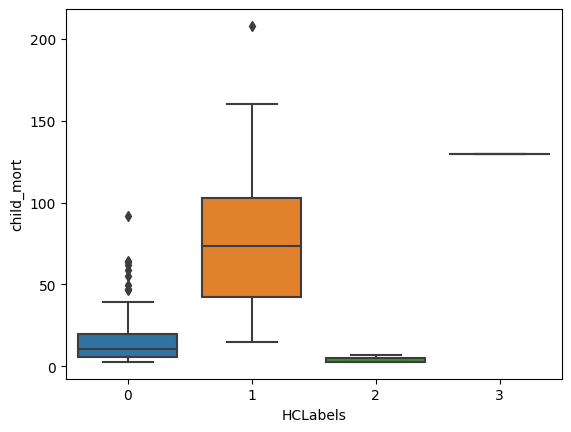

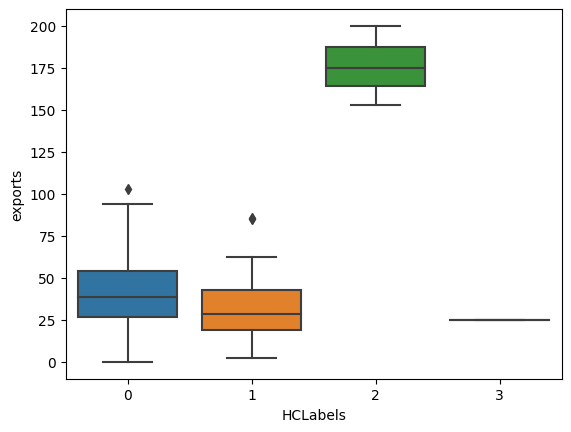

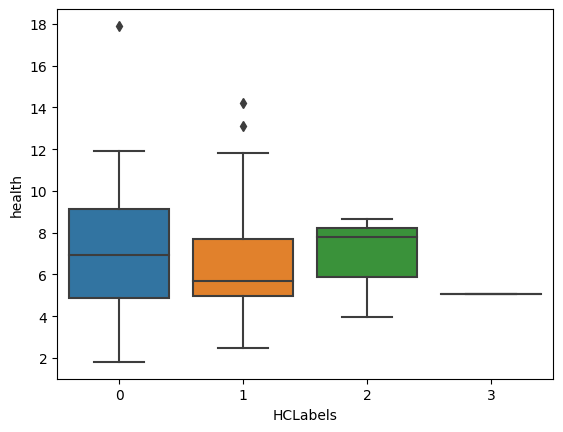

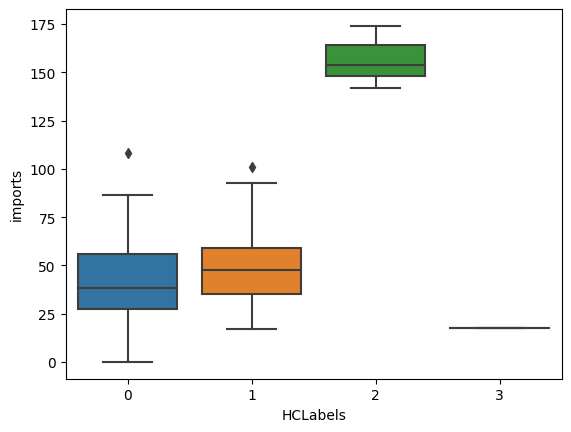

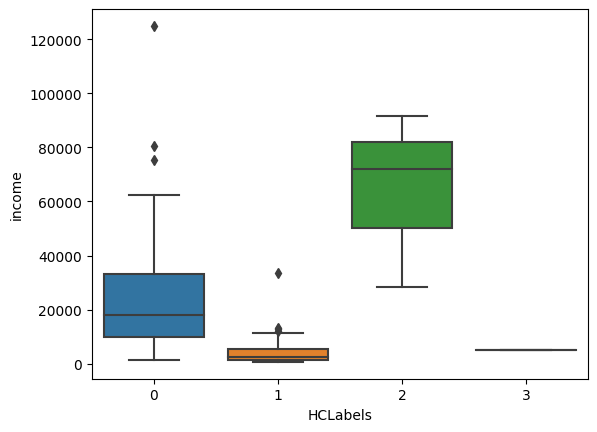

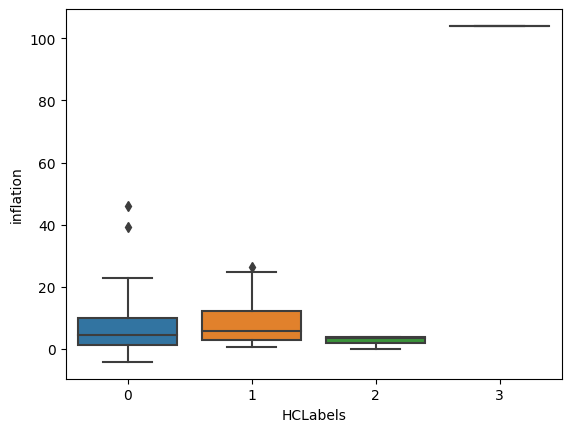

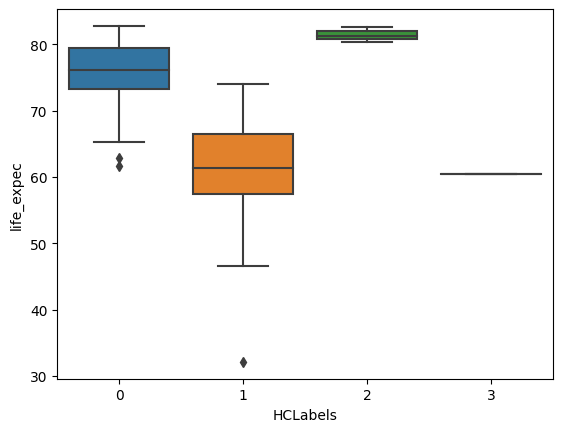

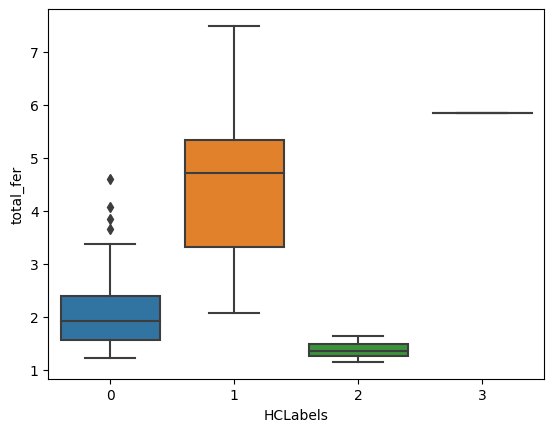

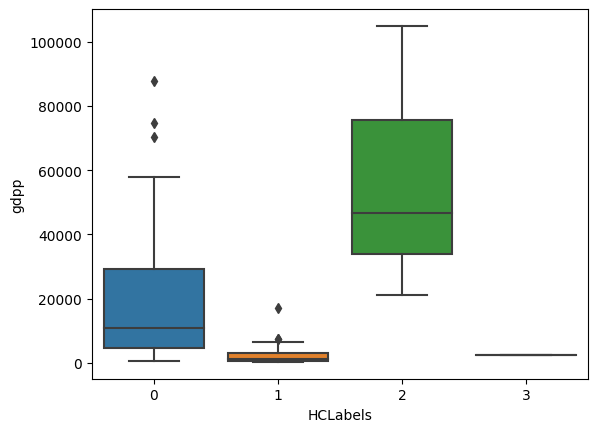

In [ ]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'HCLabels', y = col, data = df)
    plt.show()

INSIGHTS

The results from hierarchical clustering clouded by the 103 country culster, meaning there's too much overlap, or the clusters aren't distinct enough.

# Next method DBSCAN

In [ ]:
dbs = DBSCAN(eps = 1)

df_scaled_copy['DBSLabels'] = dbs.fit_predict(df_scaled)

df['DBSLabels'] = dbs.fit_predict(df_scaled)


In [ ]:

df['DBSLabels'].value_counts()

-1    90
 0    55
 1    17
 2     5
Name: DBSLabels, dtype: int64

In [ ]:
# mean and the median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = df.groupby('DBSLabels').mean()

median = df.groupby('DBSLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_-1 Mean', 'group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_-1 Median', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_hierachical[original_features].T

,group_-1 Mean,group_0 Mean,group_1 Mean,group_2 Mean,group_-1 Median,group_0 Median,group_1 Median,group_2 Median
child_mort,54.907778,17.130909,4.147059,87.340,50.900,15.70,4.100,90.20
exports,42.922211,41.525455,35.194118,24.000,36.100,37.00,29.900,22.80
health,6.254556,6.709455,10.294706,6.256,5.275,6.55,10.100,6.01
imports,48.265177,49.510909,33.982353,37.200,42.400,51.30,31.000,34.90
income,16254.611111,13433.090909,38382.352941,1785.600,5170.000,11200.00,38800.000,1610.00
inflation,11.155856,4.015527,1.309118,10.486,8.605,3.53,0.873,9.44
life_expec,67.202222,74.203636,81.076471,55.020,67.700,74.50,81.300,54.50
total_fer,3.578222,2.067455,1.708235,5.504,3.250,1.92,1.630,5.43
gdpp,10940.611111,8043.018182,43200.000000,718.600,2775.000,6250.00,41900.000,553.00


Imsights:

-  Similar culstering on high gdp, high income, VS low incme dveloping countries
- Cluster -1 has outliers given differnce between mean and median

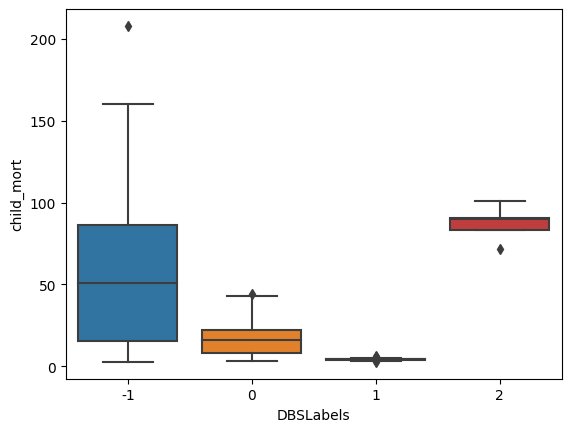

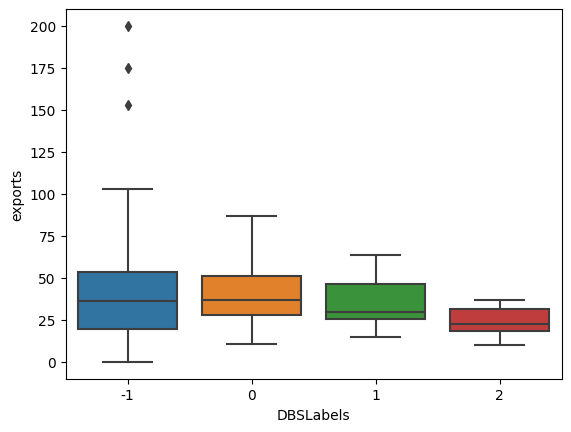

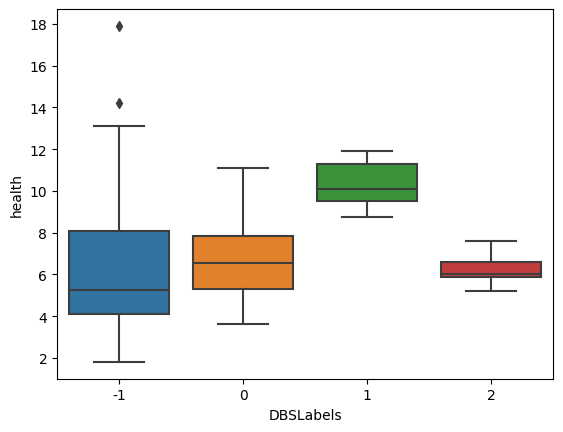

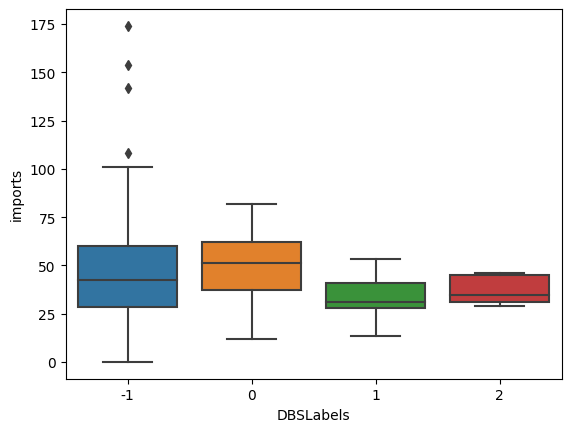

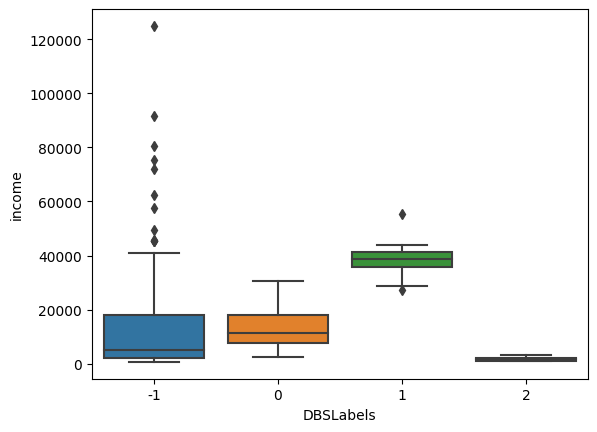

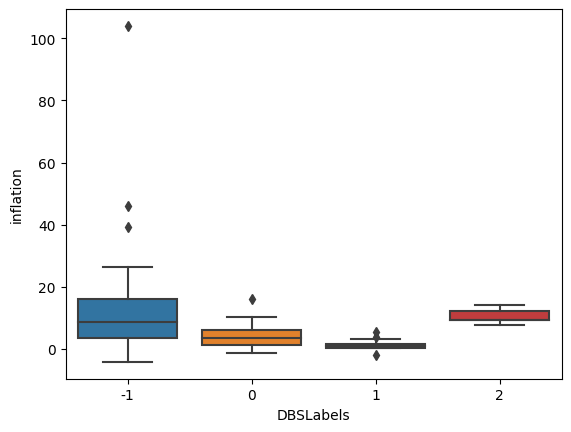

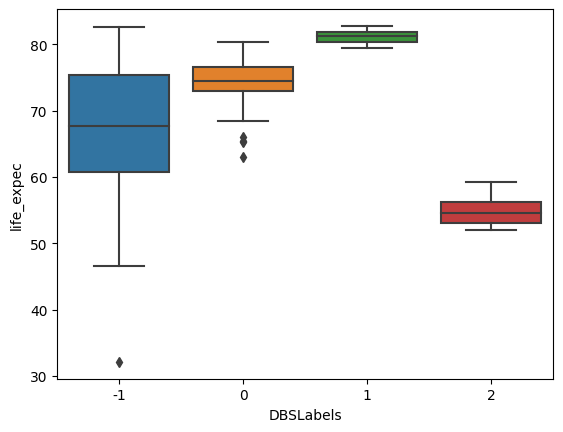

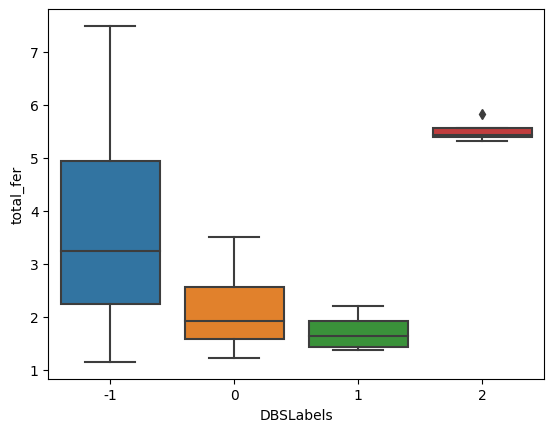

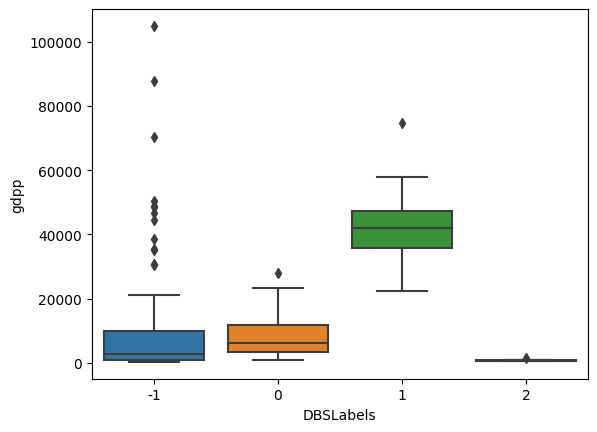

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'DBSLabels', y = col, data = df)

    plt.show()

INSIGHTS

The three clusters (0, 1, and 2) appear compact across all attributes, while cluster -1 is defined by extreme outliers on at least one attribute.

# **CONCLUSION **

Every use case for clustering analysis has different objectives that are defined by the context.  Here, our objective was:

* "To identify clusters of countries that are more similar to each other in terms of certain socio-economic factors"*

Our clustering  goal was to produce distinct clusters, so, K-mediods is best suited from the choices above.